In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

In [3]:
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [4]:
stock_prices.tail()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [5]:
stock_prices.shape

(314, 11)

In [6]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [7]:
# Duplicates
dups=stock_prices.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [8]:
# Null values
stock_prices.isnull().sum()

Date                   0
Infosys                0
Indian Hotel           0
Mahindra & Mahindra    0
Axis Bank              0
SAIL                   0
Shree Cement           0
Sun Pharma             0
Jindal Steel           0
Idea Vodafone          0
Jet Airways            0
dtype: int64

In [9]:
stock_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra & Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


In [10]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [11]:
stock_prices.head(2)

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303


In [12]:
stock_prices.skew()

Infosys                0.365769
Indian_Hotel          -0.039149
Mahindra_&_Mahindra    0.703807
Axis_Bank              0.320073
SAIL                   0.253347
Shree_Cement          -0.263323
Sun_Pharma             0.247422
Jindal_Steel           0.656228
Idea_Vodafone         -0.000930
Jet_Airways           -0.055938
dtype: float64

### 2.1) Stock Price vs Time:

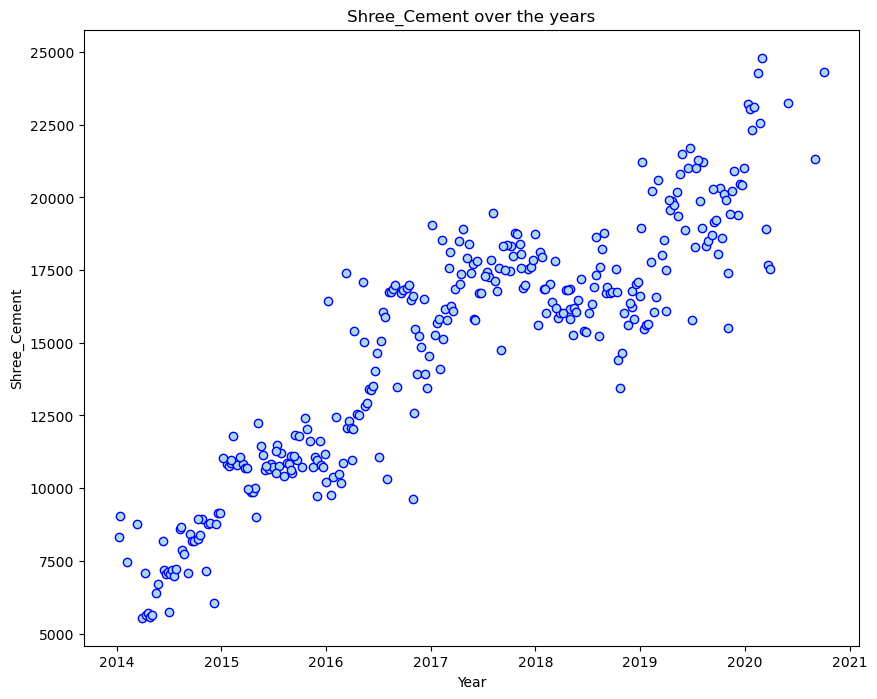

In [13]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Shree_Cement'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Shree_Cement over the years')
plt.show()

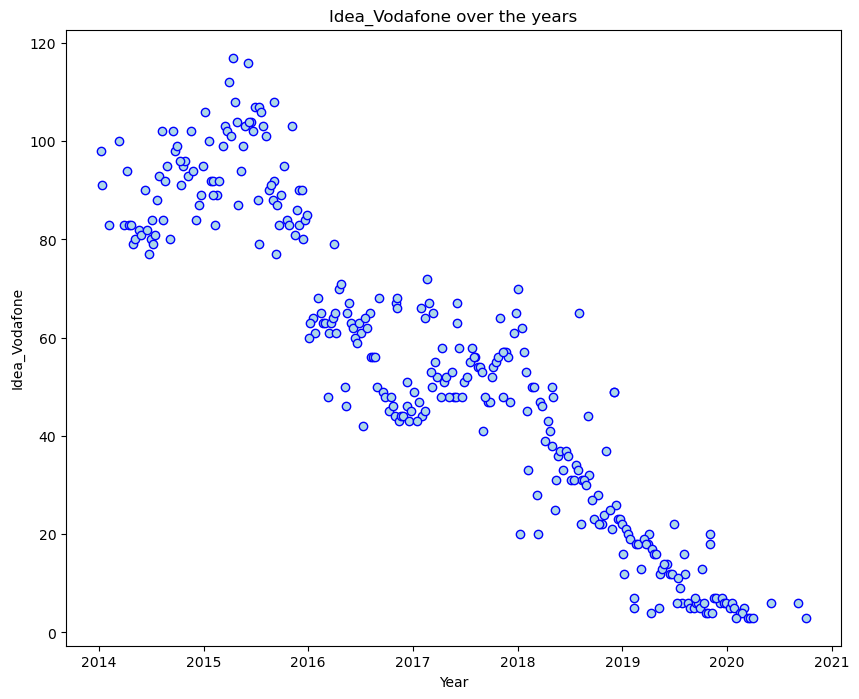

In [14]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Idea_Vodafone'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Idea_Vodafone over the years')
plt.show()

In [15]:
stock_prices.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_&_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways', 'dates'],
      dtype='object')

### 2.2) Analyzing returns for all stocks:

In [16]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [17]:
stock_returns.shape

(314, 10)

**Stock returns**

In [18]:
stock_returns.head(10)

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
5,-0.031749,-0.015504,0.040656,0.061875,0.061558,0.011400,-0.008217,0.024898,0.012579,-0.016598
6,0.019961,0.060625,0.011881,0.076961,0.112795,0.067622,-0.016639,0.097543,0.048790,0.020705
7,-0.036221,0.199333,0.038615,0.059898,0.136859,0.056790,-0.049881,0.105732,-0.024098,0.169258
8,-0.041847,-0.012121,0.064183,-0.014642,-0.023530,0.048090,0.044835,-0.010084,-0.012270,-0.181630
9,0.135666,0.081917,-0.003559,0.071154,0.213574,0.105167,-0.018724,0.132686,0.024391,0.072031


**statistical summary**

In [19]:
stock_returns.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,0.002794,0.000266,-0.001506,0.001167,-0.003463,0.003681,-0.001455,-0.004123,-0.010608,-0.009548
std,0.035070,0.047131,0.040169,0.045828,0.062188,0.039917,0.045033,0.075108,0.104315,0.097972
min,-0.167300,-0.236389,-0.285343,-0.284757,-0.251314,-0.129215,-0.179855,-0.283768,-0.693147,-0.458575
25%,-0.014514,-0.023530,-0.020884,-0.022473,-0.040822,-0.019546,-0.020699,-0.049700,-0.045120,-0.052644
50%,0.004376,0.000000,0.001526,0.001614,0.000000,0.003173,0.001530,0.000000,0.000000,-0.005780
75%,0.024553,0.027909,0.019894,0.028522,0.032790,0.029873,0.023257,0.037179,0.024391,0.036368
max,0.135666,0.199333,0.089407,0.127461,0.309005,0.152329,0.166604,0.243978,0.693147,0.300249


### 2.3) Stock Means and Standard Deviation for all stocks

In [20]:
# Stock means
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

In [21]:
# Stock standard deviation
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

In [22]:
df = pd.DataFrame({'Stock_means':stock_means, 'Stock_standard_deviation': stock_sd})
df

,Stock_means,Stock_standard_deviation
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


### 2.4) Stock Means vs Standard Deviation

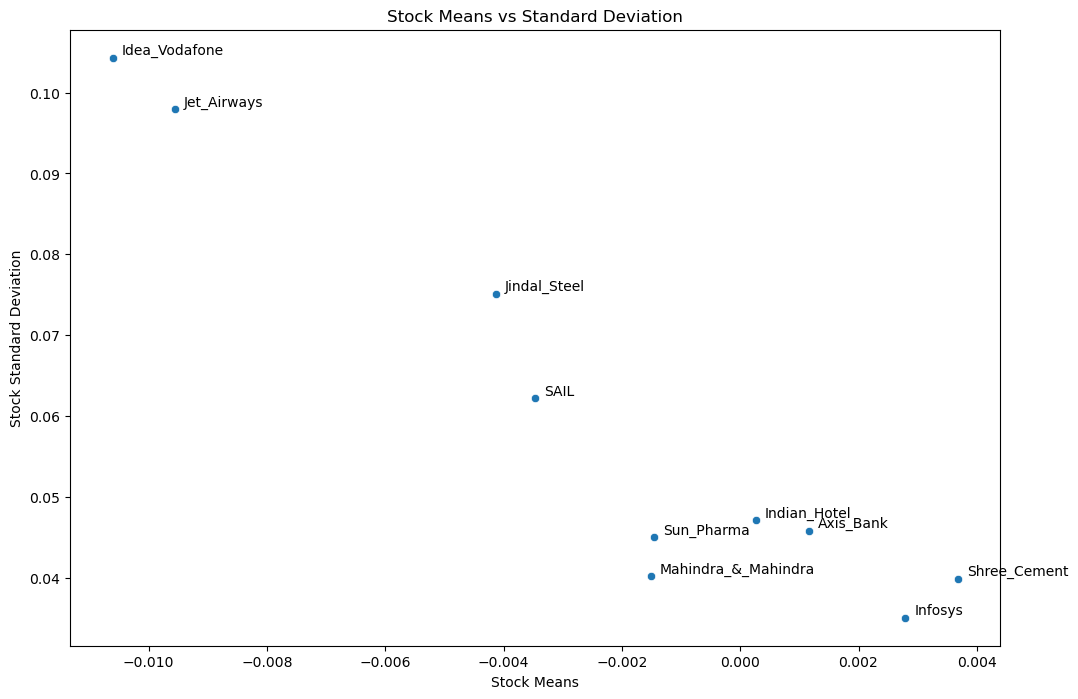

In [23]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=stock_means, y=stock_sd)
plt.title('Stock Means vs Standard Deviation')
plt.xlabel('Stock Means')
plt.ylabel('Stock Standard Deviation')

for i, name in enumerate (stock_returns.columns):
    plt.text(stock_means[i]+0.00015, stock_sd[i]+0.0004, name)

### THE END